# **Data preprocessing for Food Ingredient Image Classification**

This  notebook demonstrates loading a dataset, visualizing images, and preprocessing them using MobileNetV2. 

### **Importing necessary libraries**

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import image_dataset_from_directory
from keras.applications.mobilenet_v2 import preprocess_input

### **Define image dimensions**

In [2]:
img_width=224
img_height=224

### **Image dataset preparation**

In [3]:
# Dataset for validation
dir='D:/minora/bd_minor/bd/'
val_ds = image_dataset_from_directory(
    directory=os.path.join(dir, 'valid'),  # Directory containing validation images
    image_size=(img_height, img_width),  # Size of the images
    batch_size=32,  # Batch size for training
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='int',  # Labels are integers
)

# Dataset for testing
test_ds = image_dataset_from_directory(
    directory=os.path.join(dir, 'test'),  # Directory containing test images
    image_size=(img_height, img_width),  # Size of the images
    batch_size=32,  # Batch size for testing
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='int',  # Labels are integers
)

# Dataset for training
train_ds = image_dataset_from_directory(
    directory=os.path.join(dir, 'train'),  # Directory containing training images
    image_size=(img_height, img_width),  # Size of the images
    batch_size=32,  # Batch size for training
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='int',   # Labels are integers
)

Found 207 files belonging to 9 classes.
Found 229 files belonging to 9 classes.
Found 6840 files belonging to 9 classes.


### **Extract class names from validation dataset**

In [4]:
data_cat=val_ds.class_names
data_cat
for i in range(len(data_cat)):
    print(i,' ',data_cat[i])

0   Abulkasim
1   Baroqxon
2   Kokaldosh
3   Qaffol
4   Qaldrgoch
5   SHayhontohur
6   Shayhontohur_darvozasi
7   Suzuk ota
8   Yunusxon


### **Visualizing validation images with labels**

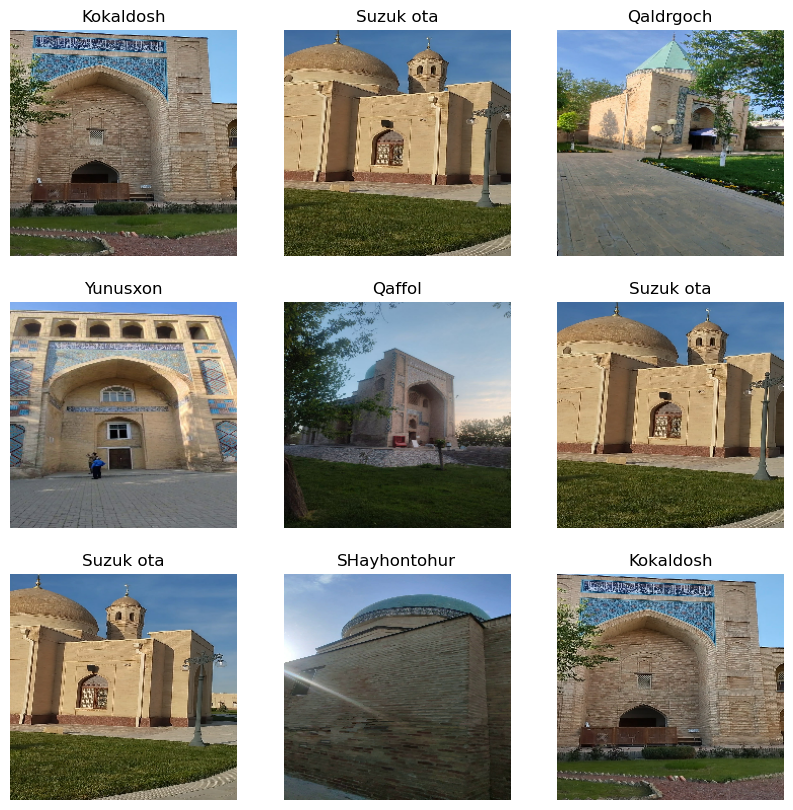

In [5]:
# Create a figure with a size of 10x10 inches
plt.figure(figsize=(10,10))

# Iterate through the first batch of images and labels in the validation dataset
for image, labels in val_ds.take(1):
    # Iterate through 9 images in the batch
    for i in range(0, 9):
        # Create subplots in a 3x3 grid
        plt.subplot(3, 3, i+1)

        # Display the image as a numpy array and convert it to unsigned 8-bit integers
        plt.imshow((image[i]).numpy().astype("uint8"))

        # Set the title of the subplot to the corresponding label from data_cat
        plt.title(data_cat[labels[i]])

        # Turn off the axis for better visualization
        plt.axis('off')

# Show the plot
plt.show()

### **Normalize the validation, train and test iamges**

In [6]:
# Preprocess the images
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

### **After normalizing, checking validation images**

0 [[[ 0.11525619  0.37239897  0.77239895]
  [ 0.12324929  0.3803922   0.78039217]
  [ 0.12231886  0.37946177  0.77946174]
  ...
  [-0.42905205 -0.21980673 -0.39822662]
  [ 0.56128824  0.7989626   0.9889269 ]
  [-0.49315387 -0.30083728 -0.06222451]]

 [[ 0.11098444  0.38568425  0.78039217]
  [ 0.10029006  0.3803922   0.7732992 ]
  [ 0.10618246  0.3838836   0.777591  ]
  ...
  [ 0.21473098  0.3396715   0.15311301]
  [-0.3815716  -0.21976602 -0.26163268]
  [-0.6365339  -0.47813112 -0.44339502]]

 [[ 0.12866151  0.3876351   0.78758514]
  [ 0.10588241  0.38823533  0.78039217]
  [ 0.10532212  0.38767505  0.779832  ]
  ...
  [-0.47382253 -0.36401862 -0.64236903]
  [-0.31867856 -0.2031303  -0.28798938]
  [ 0.4237045   0.71012914  0.857664  ]]

 ...

 [[-0.14853895 -0.14069581 -0.10932326]
  [-0.14776933 -0.11639678 -0.09286737]
  [-0.18056226 -0.15244108 -0.12240899]
  ...
  [-0.16134441 -0.14565814 -0.18487382]
  [-0.17647058 -0.1372549  -0.16862744]
  [-0.18361288 -0.1443972  -0.17576975]]



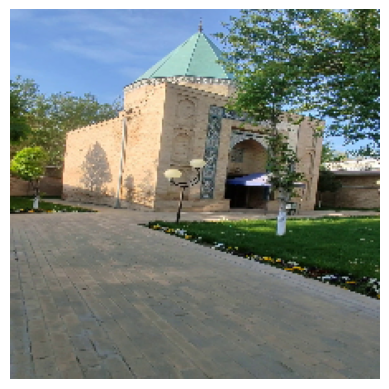

In [7]:
for image,labels in val_ds.take(1):
  """
    Iterate through the first batch of images in the validation dataset and visualize them.

    Args:
        image (tensor): The tensor containing the batch of images.
        labels (tensor): The tensor containing the corresponding labels for the images.

    Returns:
        None
    """

  for i in range(0,1):
    print(i,(image[i]).numpy())
    print('----------------------------------\n')
    plt.imshow((image[i].numpy() + 1) / 2)
    plt.axis('off')
    print((data_cat[labels[i]]))